# PCA and clustering on IRIS dataset

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
data = load_iris()
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['label']=data['target']
df['label'] = df['label'].apply(lambda x: data['target_names'][x])

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


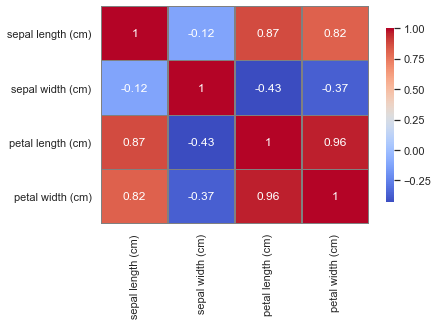

In [37]:
# Correlations
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    linewidths=.2,
    linecolor='gray',
    cbar_kws={"shrink": .8},
    annot = True,
)

## PCA analysis

In [38]:
features = [c for c in df.columns if c not in ['label']]

# Standard scale
X = np.array(df[features])
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA()
X_transformed = pca.fit_transform(X_scaled)

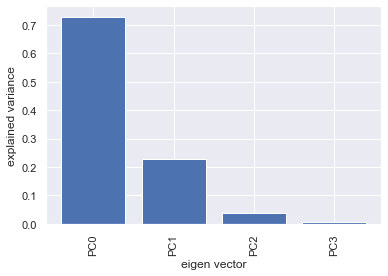

In [39]:
# Explained variance
fig, ax = plt.subplots(figsize=(6, 4))
eigenvalues = pca.explained_variance_ratio_
comp = ['PC'+str(i) for i in range(0,pca.n_components_)]
plt.bar(comp, eigenvalues)
plt.xlabel('eigen vector')
plt.ylabel('explained variance')
plt.xticks(rotation=90);

In [40]:
# eigenvectors
df_eigenvectors = pd.DataFrame(pca.components_.T, columns=comp)
df_eigenvectors['name_comp'] = features
df_eigenvectors = df_eigenvectors.set_index('name_comp')
df_eigenvectors.head()

,PC0,PC1,PC2,PC3
name_comp,,,,
sepal length (cm),0.521066,0.377418,-0.719566,-0.261286
sepal width (cm),-0.269347,0.923296,0.244382,0.123510
petal length (cm),0.580413,0.024492,0.142126,0.801449
petal width (cm),0.564857,0.066942,0.634273,-0.523597


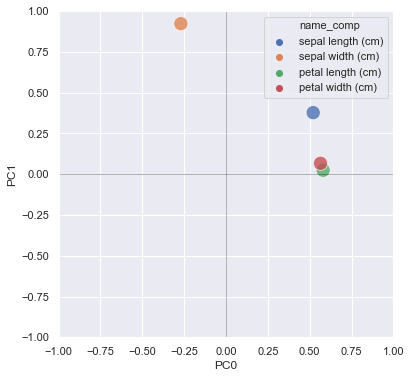

In [41]:
# Plot features in eignevectors space
fig, ax = plt.subplots(figsize=(6, 6))
radius = 1 # x/y lims

sns.scatterplot(
    data = df_eigenvectors.reset_index(),
    x='PC0', 
    y ='PC1', 
    hue='name_comp', 
    s=200, 
    alpha = 0.8,
)
plt.xlim(-radius,radius)
plt.ylim(-radius,radius)
plt.axhline(linewidth=1,color='black',alpha=0.3)
plt.axvline(linewidth=1,color='black',alpha=0.3)

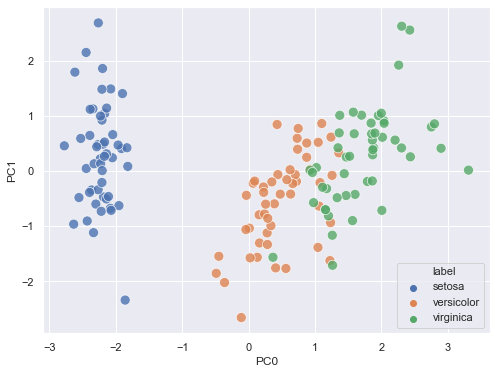

In [42]:
# Plot data in eigenvector space
df_PCA = pd.DataFrame(X_transformed[:,[0,1]],columns=['PC0','PC1'])
df_PCA['label'] = df['label']

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_PCA,x='PC0',y='PC1',hue='label',s=100, alpha=0.8)

## Clustering

In [43]:
def make_clustering(df, n_clusters, display=True):
    '''
    Fit n_cluster on df data
    returns df with cluster assignation, silhouette score and centers coordinates
    '''

    X_clust = np.array(df)
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_clust)

    df['cluster'] = cluster_labels

    centers = clusterer.cluster_centers_
    silhouette_avg = silhouette_score(X_clust, cluster_labels)
    print('Clusters = {}, Average silhouette score = {:.2f}'.format(n_clusters, silhouette_avg))
    
    # Display only if df has 2 columns
    if display:
        fig, ax = plt.subplots(figsize=(6, 4))

        sns.scatterplot(data=df_clust,x=df.columns[0],y=df.columns[1],hue='cluster',palette='tab10')
        plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",s=200,edgecolor="grey")
        for i, c in enumerate(centers):
                plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
       
    return df, silhouette_avg, centers

Clusters = 2, Average silhouette score = 0.61
Clusters = 3, Average silhouette score = 0.52
Clusters = 4, Average silhouette score = 0.50
Clusters = 5, Average silhouette score = 0.58


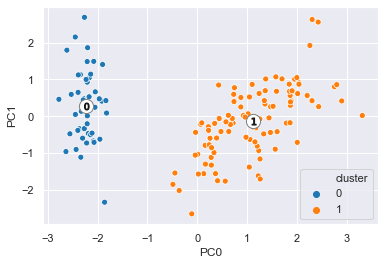

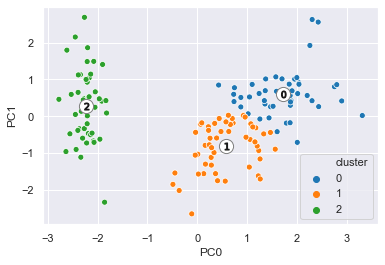

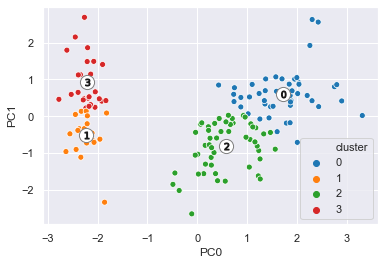

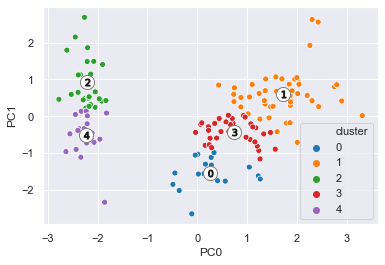

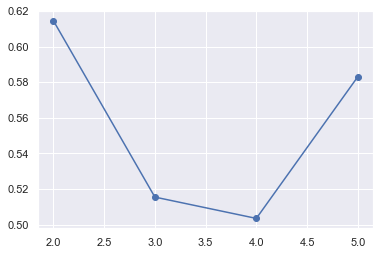

In [44]:
# Try different clusters n_clusters
df_clust = df_PCA.drop('label',axis=1)

list_silhouette_scores = []
list_n_clusters = [2,3,4,5]

for n_clusters in list_n_clusters:
    _, score, _ = make_clustering(df_clust,n_clusters)
    list_silhouette_scores.append(score)

fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(list_n_clusters,list_silhouette_scores,'o-')

Clusters = 2, Average silhouette score = 0.68
Clusters = 3, Average silhouette score = 0.55
Clusters = 4, Average silhouette score = 0.54
Clusters = 5, Average silhouette score = 0.63


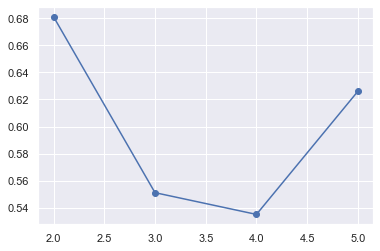

In [28]:
# Try on initial data (without scaling and PCA)
df_init = df[[c for c in df.columns if c not in ['label']]]

list_silhouette_scores = []
list_n_clusters = [2,3,4,5]

for n_clusters in list_n_clusters:
    _, score, _ = make_clustering(df_init,n_clusters,display=False)
    list_silhouette_scores.append(score)

fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(list_n_clusters,list_silhouette_scores,'o-')